<a href="https://colab.research.google.com/github/ricardoV94/mbmlbook/blob/master/MBML_Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as tt

import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.figsize': (8,6)})

In [0]:
try:
    import arviz
except ImportError:
    !pip install arviz
    
import logging
logger = logging.getLogger('pymc3')
logger.propagate = False
logger.setLevel(logging.ERROR)

In [0]:
def draw_plot(post):
    plt.figure(figsize=(14,6))
    plt.subplot2grid([1,3],[0,0], colspan=2)
    sns.distplot(post['probControl'][post['m']==1], label='p(probControl)')
    sns.distplot(post['probTreated'][post['m']==1], label='p(ProbTreated)')
    plt.legend(loc='center left', bbox_to_anchor=(.9, 0.5), fancybox=False)
    plt.xlabel('x')
    plt.ylabel('p(x)')

    plt.subplot2grid([1,3],[0,2])
    means = [np.mean(post['m'] == i) for i in range(2)]
    plt.bar([0,1], means, zorder=3)
    plt.ylim([0,1])
    plt.grid(axis='y')
    plt.xticks([0,1], ['NoEffect', 'HasEffect'])
    plt.ylabel('P( model | data)')

    plt.tight_layout()

    print(means, means[1]/means[0])



---

##   6.3 Comparing alternative models

In [0]:
treated_obs = np.array([1]*13 + [0]*(20-13))
control_obs = np.array([1]*8  + [0]*(20-8))

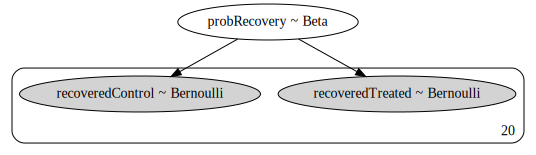

In [5]:
with pm.Model() as model1:
    probRecovery = pm.Beta('probRecovery', 1, 1)
    
    recoveredTreated = pm.Bernoulli('recoveredTreated', p=probRecovery, observed=treated_obs)
    recoveredControl = pm.Bernoulli('recoveredControl', p=probRecovery, observed=control_obs)

pm.model_to_graphviz(model1)

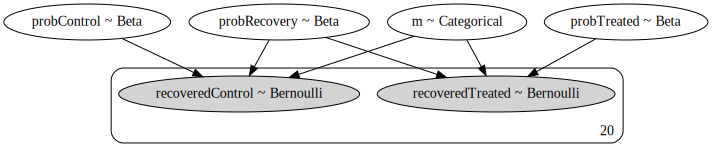

In [6]:
with pm.Model() as model3:
    m = pm.Categorical('m', np.asarray([.5, .5]))
    t_obs = theano.shared(treated_obs)
    c_obs = theano.shared(control_obs)
    
    probTreated = pm.Beta('probTreated', 1, 1)
    probControl = pm.Beta('probControl', 1, 1)
    probRecovery = pm.Beta('probRecovery', 1, 1)
    
    
    probTreated_ = pm.math.switch(tt.eq(m,0), probRecovery, probTreated)
    probControl_ = pm.math.switch(tt.eq(m,0), probRecovery, probControl)

    
    
    recoveredTreated = pm.Bernoulli('recoveredTreated', p=probTreated_, observed=t_obs)
    recoveredControl = pm.Bernoulli('recoveredControl', p=probControl_, observed=c_obs)

pm.model_to_graphviz(model3)

100%|██████████| 5500/5500 [00:10<00:00, 511.25it/s]


[0.4689, 0.5311] 1.1326508850501174


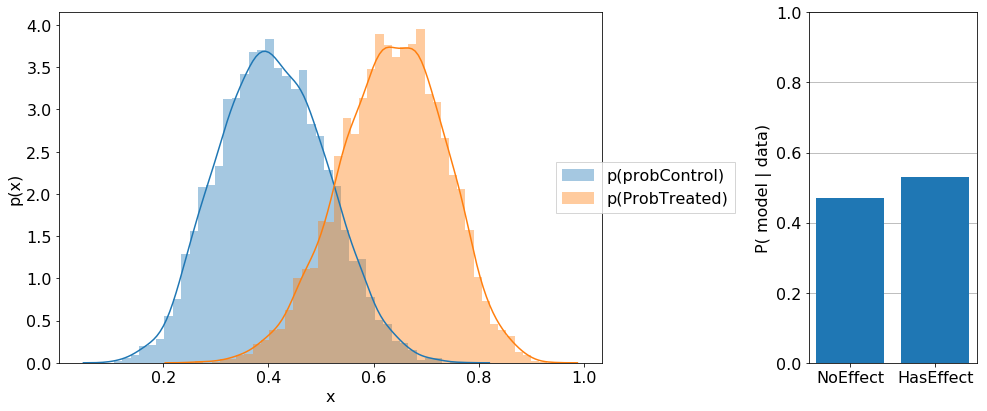

In [7]:
treated_obs = np.array([1]*13 + [0]*(20-13))
control_obs = np.array([1]*8  + [0]*(20-8))

with model3:
    t_obs.set_value(treated_obs)
    c_obs.set_value(control_obs)
    post = pm.sample(draws=5000)
    
draw_plot(post)

100%|██████████| 5500/5500 [00:08<00:00, 626.90it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


[0.7842, 0.2158] 0.27518490181076255


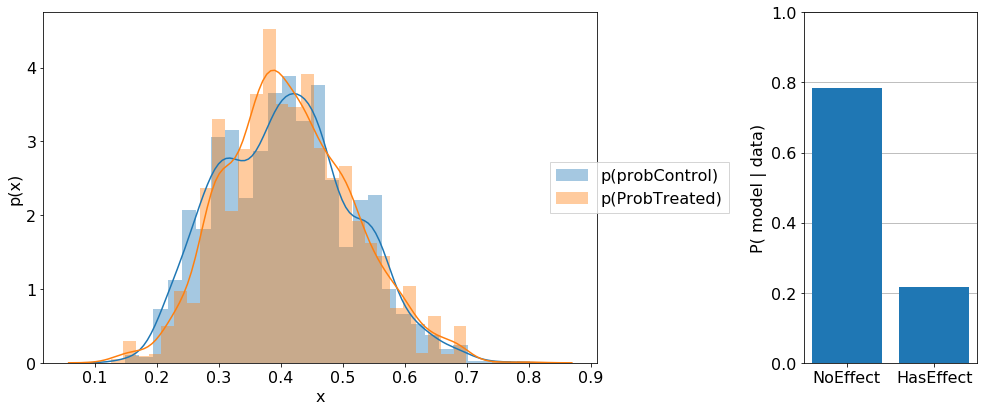

In [8]:
treated_obs = np.array([1]*8 + [0]*(20-8))
control_obs = np.array([1]*8 + [0]*(20-8))

with model3:
    t_obs.set_value(treated_obs)
    c_obs.set_value(control_obs)
    post = pm.sample(draws=5000)
    
draw_plot(post)

100%|██████████| 5500/5500 [00:06<00:00, 794.63it/s]
There were 73 divergences after tuning. Increase `target_accept` or reparameterize.
There were 179 divergences after tuning. Increase `target_accept` or reparameterize.


[0.0188, 0.9812] 52.191489361702125


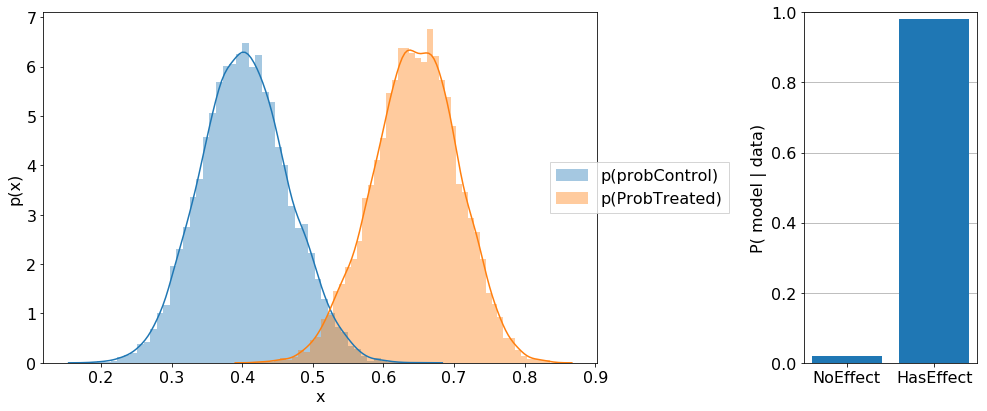

In [9]:
treated_obs = np.array([1]*39 + [0]*(60-39))
control_obs = np.array([1]*24  + [0]*(60-24))

with model3:
    t_obs.set_value(treated_obs)
    c_obs.set_value(control_obs)
    post = pm.sample(draws=5000)
    
draw_plot(post)